In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier

IsAlert


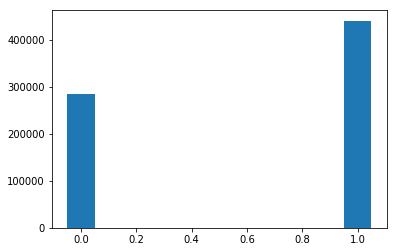

P1


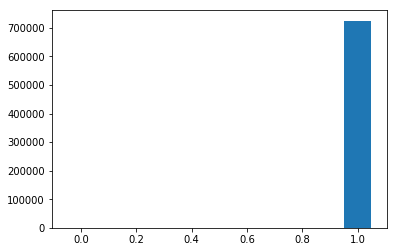

P2


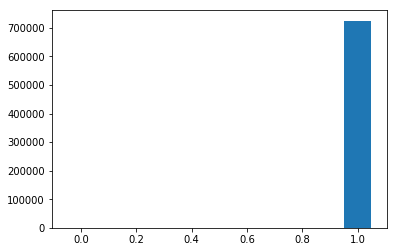

P3


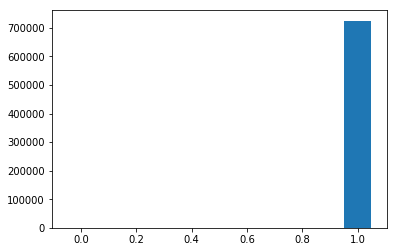

P4


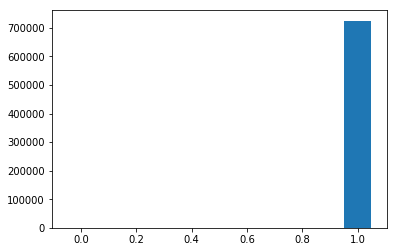

P5


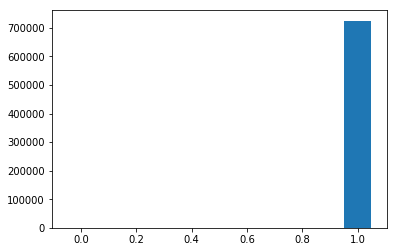

P6


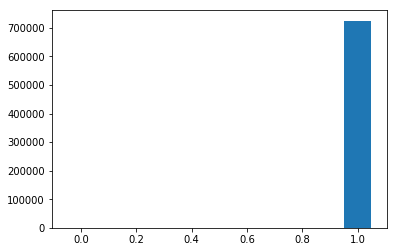

P7


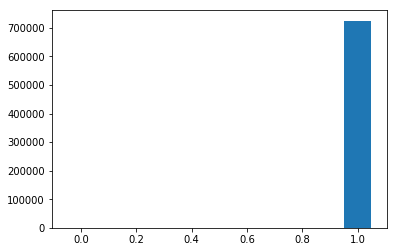

E1


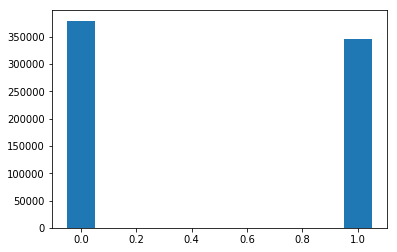

E2


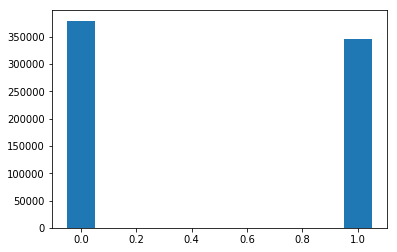

E3


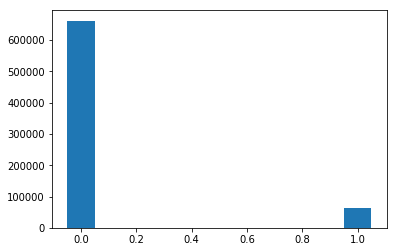

E4


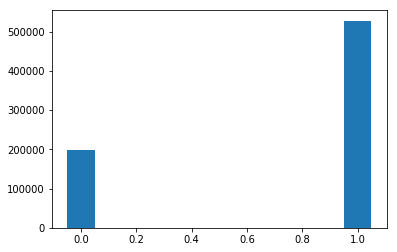

E5


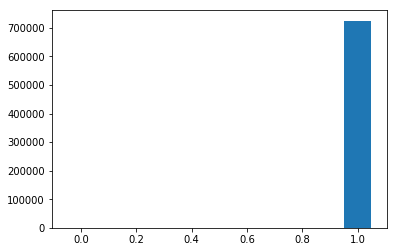

E6


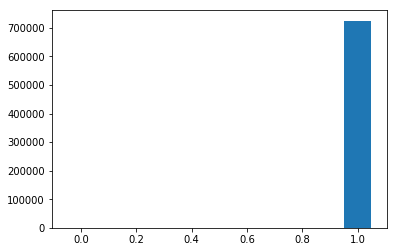

E7


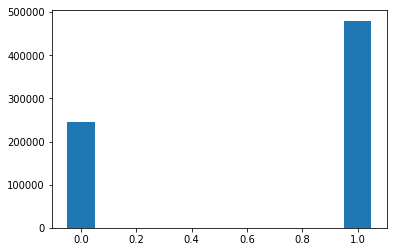

E8


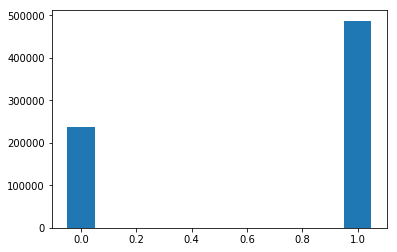

E9


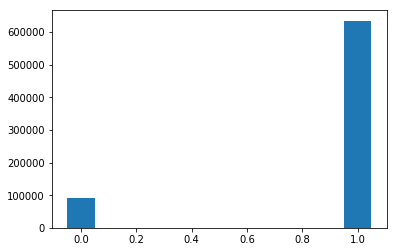

E10


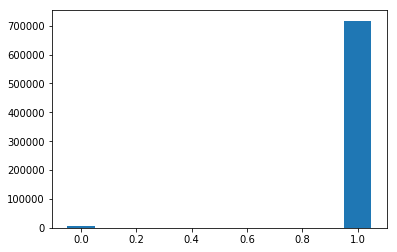

E11


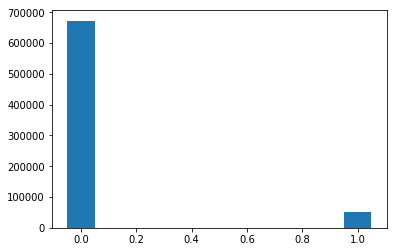

V1


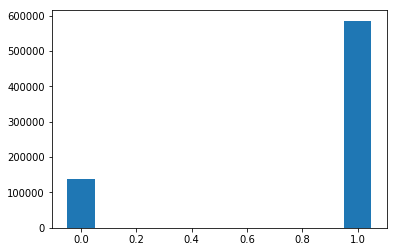

V2


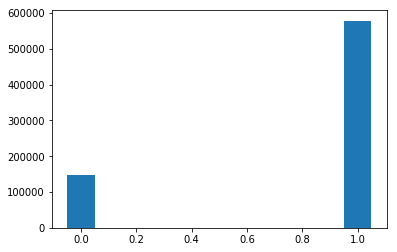

V3


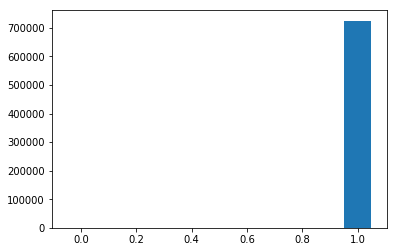

V4


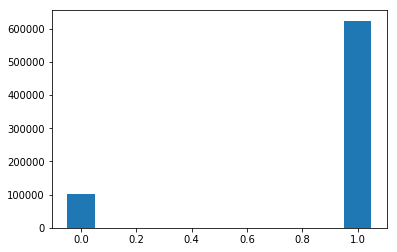

V5


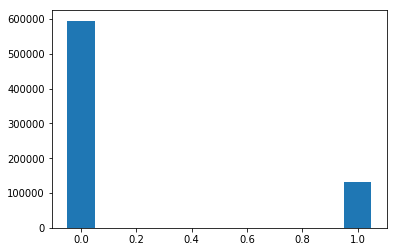

V6


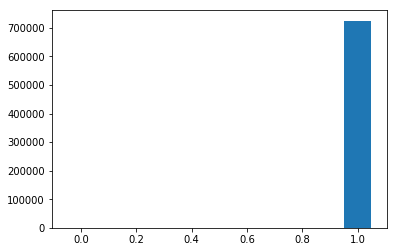

V7


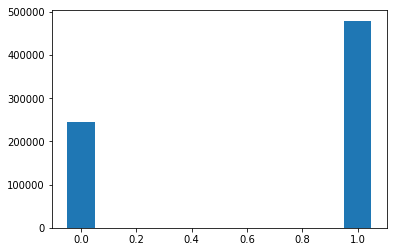

V8


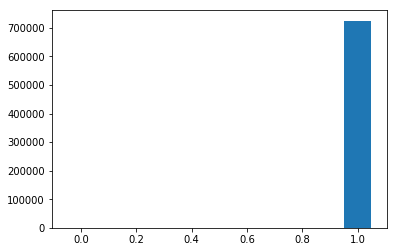

V9


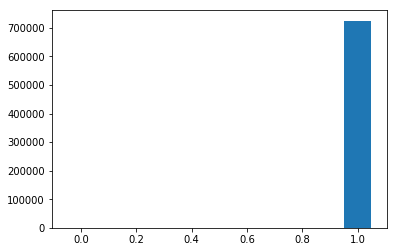

In [2]:
# checking feature balance
raw_data = pd.read_csv('data.csv')
for i in raw_data.columns:
    x = raw_data[i]
    plt.bar([0,1], [raw_data[i].count() - raw_data[i].astype(bool).sum(axis=0),raw_data[i].astype(bool).sum(axis=0)],width=0.1)
    print(i)
    plt.show()

In [3]:
# droping columns where most of the values are zeros
raw_data.drop(['E3', 'E11', 'V5'], axis=1)

,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,...,E9,E10,V1,V2,V3,V4,V6,V7,V8,V9
0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,0.000,0.000,...,1,57,101.96,0.175,752,5.99375,2005,13.4,4,14.8004
1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,0.000,0.000,...,1,57,101.98,0.455,752,5.99375,2007,13.4,4,14.7729
2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,0.000,0.000,...,1,57,101.97,0.280,752,5.99375,2011,13.4,4,14.7736
3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,0.000,0.000,...,1,57,101.99,0.070,752,5.99375,2015,13.4,4,14.7667
4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,0.000,0.000,...,1,57,102.07,0.175,752,5.99375,2017,13.4,4,14.7757
5,0,34.3729,13.64440,1400,42.8571,0.290601,576,104.1670,0.000,0.000,...,1,57,102.00,0.280,752,5.99375,2016,13.4,4,14.7498
6,0,34.3851,10.16540,1400,42.8571,0.290601,576,104.1670,0.000,0.000,...,1,57,102.01,0.175,752,5.99375,2016,13.4,4,14.7578
7,0,34.4313,13.32700,1400,42.8571,0.290601,576,104.1670,0.000,0.000,...,1,57,101.93,0.280,752,5.99375,2011,13.4,4,14.7729
8,0,34.4970,17.71240,1400,42.8571,0.290601,592,101.3510,0.000,0.000,...,1,57,101.88,0.070,752,5.99375,2011,13.4,4,14.7835
9,0,34.5994,6.88282,1400,42.8571,0.290601,592,101.3510,0.000,0.000,...,1,57,101.93,0.175,752,5.99375,2012,13.4,4,14.7757


In [4]:
# splitting into training and testing
X = raw_data.iloc[:,1::]
Y = raw_data.iloc[:,0]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.20)

In [6]:
# feature scaling/Normalization of training and testing data

col_list = ['P1', 'P2', 'P3', 'P4', 'P6', 'P7', 
            'E1', 'E2', 'E3', 'E4','E6', 'E7', 'E8', 'E10', 'E11',
            'V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V9']

for i in col_list:
    Xtrain[i] = (Xtrain[i] - Xtrain[i].mean())/(Xtrain[i].max() - Xtrain[i].min())

for i in col_list:
    Xtest[i] = (Xtest[i] - Xtest[i].mean())/(Xtest[i].max() - Xtest[i].min())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [7]:
# Logistic Regression
lr = LogisticRegression(C=0.5)
lr.fit(Xtrain,ytrain.values.ravel())

# Training Accuracy
lr.score(Xtrain, ytrain)

# Testing Accuracy
ypred = lr.predict(Xtest)
print(accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

0.802729015265
             precision    recall  f1-score   support

          0       0.80      0.66      0.72     56796
          1       0.80      0.89      0.85     88238

avg / total       0.80      0.80      0.80    145034



In [8]:
# BernoulliNB
bnb = BernoulliNB()
bnb.fit(Xtrain,ytrain.values.ravel())

# Training Accuracy
bnb.score(Xtrain, ytrain)

# Testing Accuracy
ypred = bnb.predict(Xtest)
print(accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

0.746259497773
             precision    recall  f1-score   support

          0       0.66      0.74      0.69     56796
          1       0.82      0.75      0.78     88238

avg / total       0.75      0.75      0.75    145034



In [9]:
# Random Forests
rfc = RandomForestClassifier()
rfc.fit(Xtrain,ytrain.values.ravel())

# Training Accuracy
rfc.score(Xtrain, ytrain)

# Testing Accurcy
ypred = rfc.predict(Xtest)
print(accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

0.989857550643
             precision    recall  f1-score   support

          0       0.99      0.98      0.99     56796
          1       0.99      1.00      0.99     88238

avg / total       0.99      0.99      0.99    145034

